In [1]:
from project_utilities import *
from project_utilities import visualize_matrix as vis_mat
import numpy as np
import matplotlib.pyplot as plt
import numba
from scipy.optimize import curve_fit


In [2]:
init_mpl(150)

# Functions

In [3]:
def q(x):
    return 0

def solution(X,q,BC1 = 0, BC2 = 1, e = 0.10):
    C = np.zeros(X.shape[0]-1)
    h = np.zeros(X.shape[0]-1)
    for i in range(C.shape[0]):
        C[i] = (X[i+1] + X[i])/2
        h[i] = (X[i+1] - X[i])
    A = np.zeros((C.shape[0],C.shape[0]))
    b = np.zeros(C.shape[0])
    for i in range(C.shape[0]):
        if i == 0:
            hf = (h[i+1]+h[i])/2
            A[i,i] = e/hf + 1/2 + 2*e/h[i]
            A[i,i+1] = 1/2  -e/hf 
            b[i] = h[i]*q(C[i]) + BC1 + 2*e/h[i]*BC1
            
        elif i == C.shape[0]-1:
            hb = (h[i]+h[i-1])/2
            A[i,i] = e/hb - 1/2 + 2*e/h[i]
            A[i,i-1] = -1/2 -e/hb
            b[i] = h[i]*q(C[i]) - BC2 + 2*e/h[i]*BC2
        else:
            hf = (h[i+1]+h[i])/2
            hb = (h[i]+h[i-1])/2
            A[i,i] = e/hf + e/hb
            A[i,i+1] = 1/2 + -e/hf
            A[i,i-1] = -1/2 -e/hb
            b[i] = h[i]*q(C[i])  
    phi = np.linalg.solve(A,b)
    cache = np.zeros(phi.shape[0]+2)
    real_phi= cache.copy()
    real_phi[0] = BC1
    real_phi[-1] = BC2
    real_phi[1:-1] = phi
    real_C= cache.copy()
    real_C[0] = X[0]
    real_C[-1] = X[-1]
    real_C[1:-1] = C
    return real_C,real_phi
    
def analytic(x,e,BC1,BC2):
    pe = 1/e
    res = BC1 + (BC2-BC1)*(np.exp((x-1)*pe) - np.exp(-pe))/(1 - np.exp(-pe))
    return res

# First solution

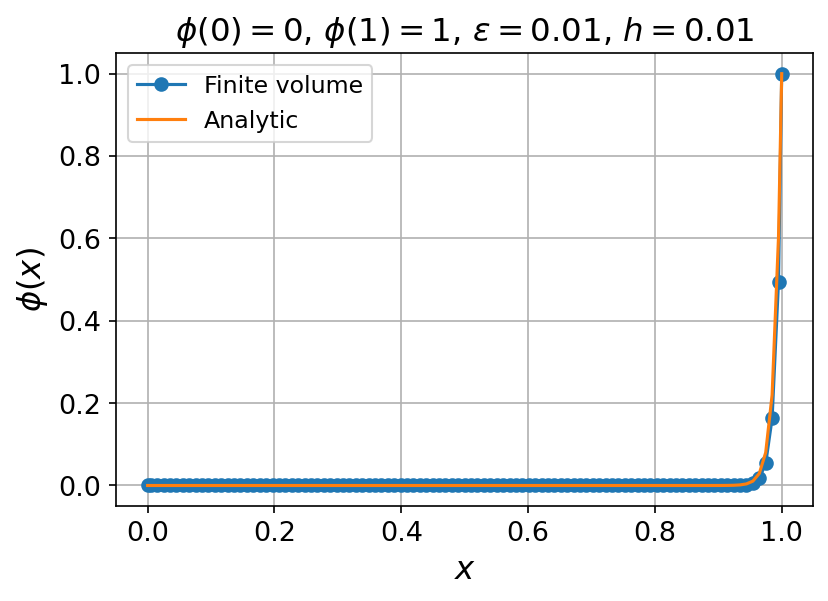

In [4]:
a = 0
b =1
e = 10**-2

h = 0.01
X = np.linspace(0,1,int(np.rint(1/h)))
x,phi = solution(X,q,BC1 = a,BC2 = b,e = e)
r_phi = analytic(x,e,BC1 =a,BC2=b)
plt.plot(x,phi,marker = 'o')
plt.plot(x,r_phi)
plt.xlabel('$x$')
plt.ylabel('$\phi(x)$')
plt.title('$\phi(0)='+str(a)+'$, $\phi(1)='+str(b)+'$, $\epsilon = '+str(e)+'$, $h = ' + str(h) + '$')
plt.legend(('Finite volume','Analytic'))
plt.grid(True)
plt.show()

# Confirm error

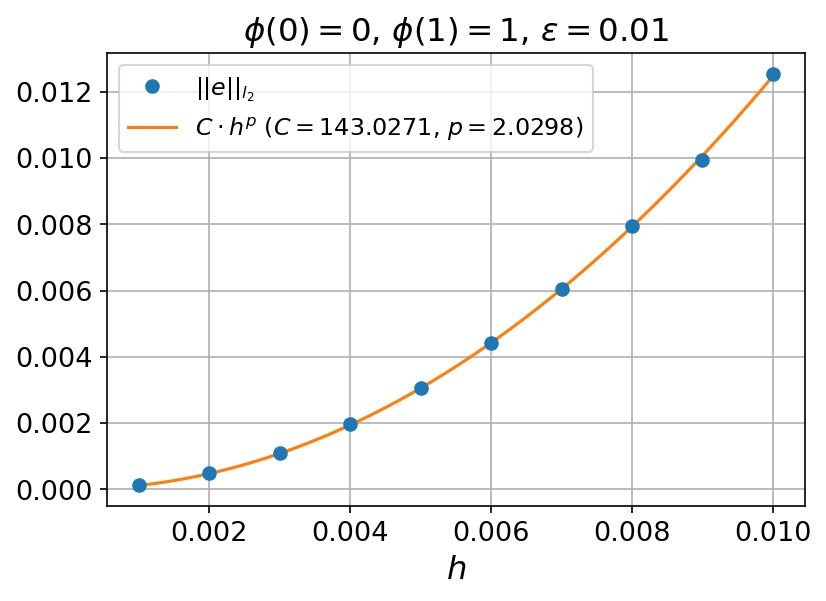

In [5]:
def funct(x,a,b):
    return a*x**b



def error(vec1,vec2, C = 2):
    return np.linalg.norm(vec1-vec2)/np.sqrt(len(vec1-C))
a = 0
b =1
e = 10**-2
hs = np.linspace(0.01,0.001,10)
errs = []
for h in hs:
    X = np.linspace(0,1,int(np.ceil(1/h)))
    x,phi = solution(X,q,BC1 = a,BC2 = b,e = e)
    r_phi = analytic(x,e,BC1 =a,BC2=b)
    errs.append(error(phi,r_phi))
errs =np.array(errs)
popt, pcov = curve_fit(funct, hs, errs)
plt.plot(hs,errs,marker = 'o', linestyle = "",zorder = 12)
test = np.linspace(hs.min(),hs.max(),100)
plt.plot(test,funct(test,popt[0],popt[1]))
plt.xlabel('$h$')
plt.grid(True)
plt.legend(('$||e||_{l_2}$','$C \cdot h^p$ ($C ='+str(np.round(popt[0],4))+'$, $p = '+str(np.round(popt[1],4))+'$)'))
plt.title('$\phi(0)='+str(a)+'$, $\phi(1)='+str(b)+'$, $\epsilon = '+str(e)+'$')
plt.show()

# Manufactured solutions

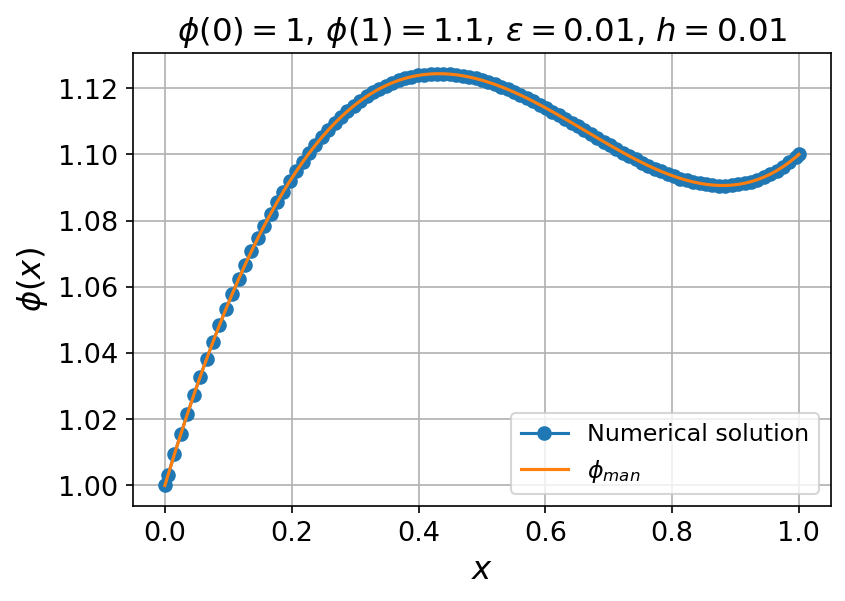

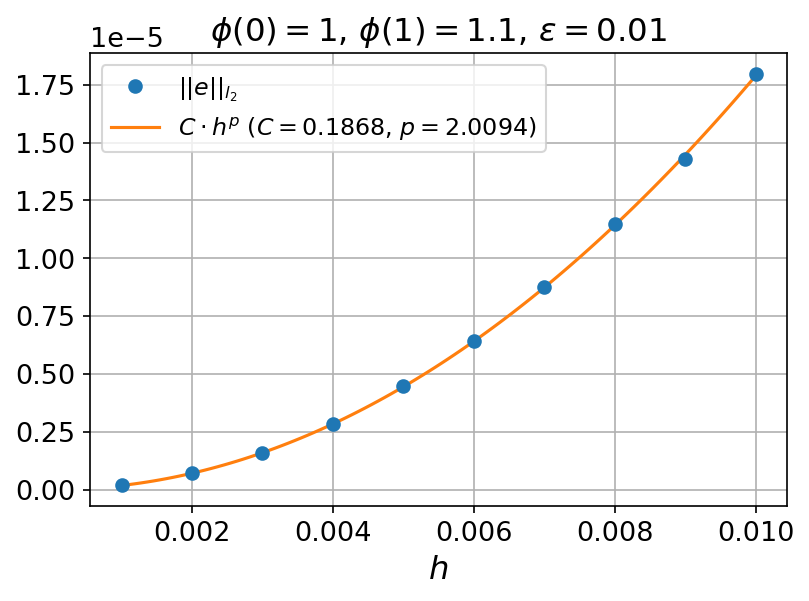

In [6]:
a = 1
b =1.1
e = 10**-2

def q2(x,a = a,b = b, e = e):
    alpha = a
    beta = b/(1-np.exp(1))
    return -1/2*np.pi*alpha*np.sin(1/2*np.pi*x) - beta*np.exp(x) - e *(-1/4*np.pi**2*alpha*np.cos(1/2*np.pi*x)-beta*np.exp(x))

def analytic2(x,e,BC1,BC2):
    alpha = BC1
    beta = BC2/(1-np.exp(1))
    return alpha *np.cos(1/2*np.pi*x) +beta*(1-np.exp(x))


h = 0.01
X = np.linspace(0,1,int(np.ceil(1/h)))
x,phi = solution(X,q2,BC1 = a,BC2 = b,e = e)
r_phi = analytic2(x,e,BC1 =a,BC2=b)
plt.plot(x,phi,marker = 'o')
plt.plot(x,r_phi)
plt.xlabel('$x$')
plt.ylabel('$\phi(x)$')
plt.title('$\phi(0)='+str(a)+'$, $\phi(1)='+str(b)+'$, $\epsilon = '+str(e)+'$, $h = ' + str(h) + '$')
plt.legend(('Numerical solution','$\phi_{man}$'))
plt.grid(True)
plt.show()


def funct(x,a,b):
    return a*x**b


hs = np.linspace(0.01,0.001,10)
errs = []
for h in hs:
    X = np.linspace(0,1,int(np.ceil(1/h)))
    x,phi = solution(X,q2,BC1 = a,BC2 = b,e = e)
    r_phi = analytic2(x,e,BC1 =a,BC2=b)
    errs.append(error(phi,r_phi))
errs =np.array(errs)
popt, pcov = curve_fit(funct, hs, errs)

test = np.linspace(hs.min(),hs.max(),100)
plt.plot(hs,errs,marker = 'o', linestyle = "",zorder = 12)
plt.plot(test,funct(test,popt[0],popt[1]))



plt.xlabel('$h$')
plt.grid(True)
plt.legend(('$||e||_{l_2}$','$C \cdot h^p$ ($C ='+str(np.round(popt[0],4))+'$, $p = '+str(np.round(popt[1],4))+'$)'))
plt.title('$\phi(0)='+str(a)+'$, $\phi(1)='+str(b)+'$, $\epsilon = '+str(e)+'$')
plt.show()

# Overlapping grids functions

In [7]:
def q(x):
    return (np.sin(np.pi*x))

def q_int(h1,h2):
    return (-1/np.pi *np.cos(np.pi*h2) + 1/np.pi *np.cos(np.pi*h1))


def mat_gen(X,q,BC1 = 0, BC2 = 1, e = 1,q_int = None,first = True):
    C = np.zeros(X.shape[0]-1)
    h = np.zeros(X.shape[0]-1)
    for i in range(C.shape[0]):
        C[i] = (X[i+1] + X[i])/2
        h[i] = (X[i+1] - X[i])
    A = np.zeros((C.shape[0],C.shape[0]))
    b = np.zeros(C.shape[0])
    if first:
        for i in range(C.shape[0]):
            if i == 0:
                hf = (h[i+1]+h[i])/2
                A[i,i] = e/hf + 2*e/h[i]
                A[i,i+1] =  -e/hf 
                if q_int == None:
                    b[i] = h[i]*q(C[i])  + 2*e/h[i]*BC1
                else:
                    b[i] = q_int(X[i],X[i+1])  + 2*e/h[i]*BC1

            elif i == C.shape[0]-1:
                hb = (h[i]+h[i-1])/2
                A[i,i] = e/hb + e/hb
                A[i,i-1] =  -e/hb
                if q_int == None:
                    b[i] = h[i]*q(C[i])
                else:
                    b[i] = q_int(X[i],X[i+1])
            else:
                hf = (h[i+1]+h[i])/2
                hb = (h[i]+h[i-1])/2
                A[i,i] = e/hf + e/hb
                A[i,i+1] =  -e/hf
                A[i,i-1] =  -e/hb
                if q_int == None:
                    b[i] = h[i]*q(C[i])
                else:
                    b[i] = q_int(X[i],X[i+1])
    if not first:
        for i in range(C.shape[0]):
            if i == 0:
                hf = (h[i+1]+h[i])/2
                A[i,i] = e/hf + e/hf
                A[i,i+1] =  -e/hf
                if q_int == None:
                    b[i] = h[i]*q(C[i])
                else:
                    b[i] = q_int(X[i],X[i+1])
            elif i == C.shape[0]-1:
                hb = (h[i]+h[i-1])/2
                A[i,i] = e/hb + 2*e/h[i]
                A[i,i-1] = -e/hb
                if q_int == None:
                    b[i] = h[i]*q(C[i])  + 2*e/h[i]*BC2
                else:
                    b[i] = q_int(X[i],X[i+1])  + 2*e/h[i]*BC2
            else:
                hf = (h[i+1]+h[i])/2
                hb = (h[i]+h[i-1])/2
                A[i,i] = e/hf + e/hb
                A[i,i+1] =  -e/hf
                A[i,i-1] =  -e/hb
                if q_int == None:
                    b[i] = h[i]*q(C[i])
                else:
                    b[i] = q_int(X[i],X[i+1])
    return A,b,C,len(C),h


def interpolate(x,C,acc = 8):
    for i in range(C.shape[0]-1):
        check = np.round(x,acc)
        if check >= np.round(C[i],acc) and check <= np.round(C[i+1],acc):
            beta = (check-np.round(C[i],acc))/(np.round(C[i+1],acc)-np.round(C[i],acc))
            cache = i
    return cache,beta

def chimera(start = 0, end = 1, split = 0.5 ,h = 0.05, H = 0.05, buffer = 0.1
            ,q_int = q_int,mat_gen = mat_gen,BC1 = 0,BC2 = 1,e =1,interpolate = interpolate,q = None, steps1 = None, steps2 = None,minimize_buffer = False, minimize_multiplier = 1):
    if minimize_buffer:
        m = minimize_multiplier
        Ce = split
        St = start
        End = end
        L = steps1 - 1
        K = steps2 - 1
        h_comp = ((Ce-St)/(2*L) + (Ce-End)/(2*K))/(-1/(2*L)+1/(2*K)-2)
        H_comp = (-(Ce-St)/(2*L) - (Ce-End)/(2*K))/(-1/(2*K)+1/(2*L)-2)
        buffer = m*max(h_comp,H_comp)
        #start
        #end 
        #split 
        
    
    
    
    if steps1 == None:
        X1 = np.linspace(start,split + buffer,1+int(np.rint(((split+buffer)-start)/h)))
    else: 
        X1 = np.linspace(start,split + buffer,steps1)
    if steps2 == None:
        X2 = np.linspace(split-buffer,end,1+int(np.rint((end-(split-buffer))/H)))
    else: 
        X2 = np.linspace(split-buffer,end,steps2)
    A1,b1,C1,J,h1 = mat_gen(X1,q,BC1,BC2,e,q_int = q_int, first = True)
    A2,b2,C2,K,h2 = mat_gen(X2,q,BC1,BC2,e,q_int = q_int, first = False)
    mat = np.zeros((J+K,J+K))
    mat[:J,:J] = A1
    mat[J:J+K,J:J+K] = A2
    ##################### Linking fine to coarse #############
    coord = C1[-1] + h1[-1]
    i,beta = interpolate(coord,C2)
    mat[J-1,J+i] = -e/h1[-1]*(1- beta)
    mat[J-1,J+i+1] = -e/h1[-1]*beta
    ##################### Linking coars to fine ###################
    coord = C2[0] - h2[0]
    i,beta = interpolate(coord,C1)
    mat[J,i] = -e/h2[0]*(1- beta)
    mat[J,i+1] = -e/h2[0]*beta
    #print(h1[-1])
    #print(h2[0])
    if steps1 == None and steps2 == None:
        return mat, np.concatenate([b1,b2]), C1,C2
    else:
        return mat, np.concatenate([b1,b2]), C1,C2, (h1[-1],h2[0])

# Simple solutions

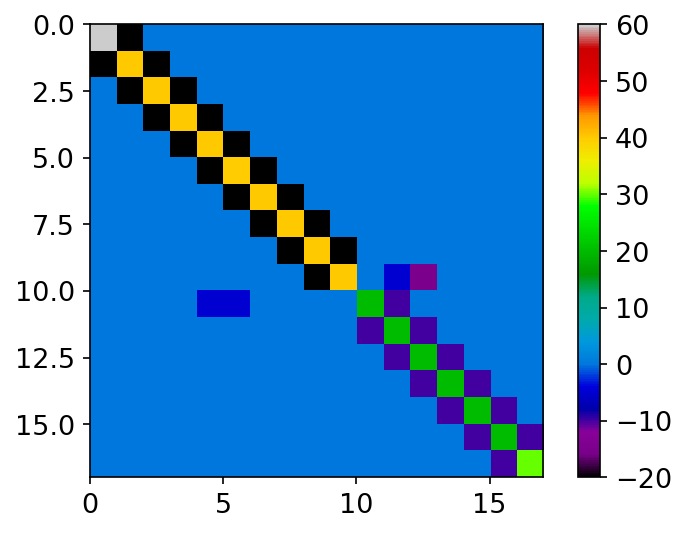

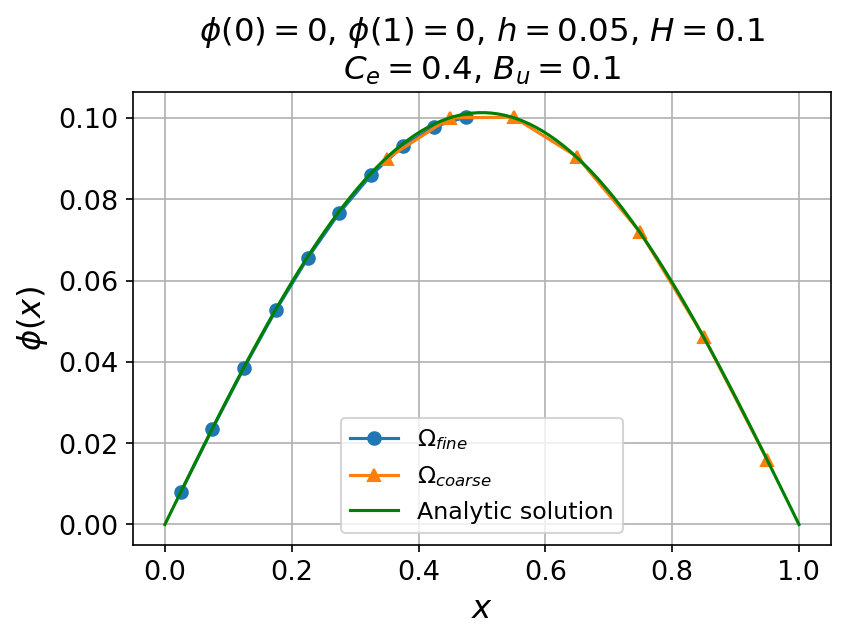

In [8]:
start = 0
end = 1
a = 0
b = 0
e = 1
h = 0.05
H = 0.1
buffer = 0.1
split = 0.4

#def q3(x,a = a,b = b, e = e):
#    alpha = a
#    beta = b/(1-np.exp(1))
#    return (- e *(-1/4*np.pi**2*alpha*np.cos(1/2*np.pi*x)-beta*np.exp(x)))

#def analytic3(x,e=2,BC1=a,BC2=b):
#    alpha = BC1
#    beta = BC2/(1-np.exp(1))
#    return (alpha *np.cos(1/2*np.pi*x) +beta*(1-np.exp(x)))

def q_int(x1,x2):
    return -(1/(np.pi))*np.cos(np.pi*x2)+(1/(np.pi))*np.cos(np.pi*x1)

def q3(x):
    return np.sin(np.pi*x)

def analytic3(x):
    return 1/(np.pi**2)*np.sin(np.pi*x)

A,r,C1,C2 =chimera(start = start, end = end,split = split, h = h,H = H,buffer =buffer,e = e,BC1 = a,BC2 = b, q_int = None,q = q3)
vis_mat(A)
phi = np.linalg.solve(A,r)
plt.plot(C1,phi[:C1.shape[0]],marker = 'o')
plt.plot(C2,phi[C1.shape[0]:],marker = '^')
test = np.linspace(start,end,100)
plt.plot(test,analytic3(test),color = 'green')
plt.title('$\phi(0)='+str(a)+'$, $\phi(1)='+str(b)+'$, $h = '+str(h)+'$, $H = ' + str(H) + '$\n$C_e=' +str(split)
          + '$, $B_u = ' + str(buffer) + '$')
plt.xlabel('$x$')
plt.ylabel('$\phi(x)$')
plt.grid(True)
plt.legend(('$\Omega_{fine}$','$\Omega_{coarse}$','Analytic solution'))
plt.show()




# Keeping $B_u$ constant

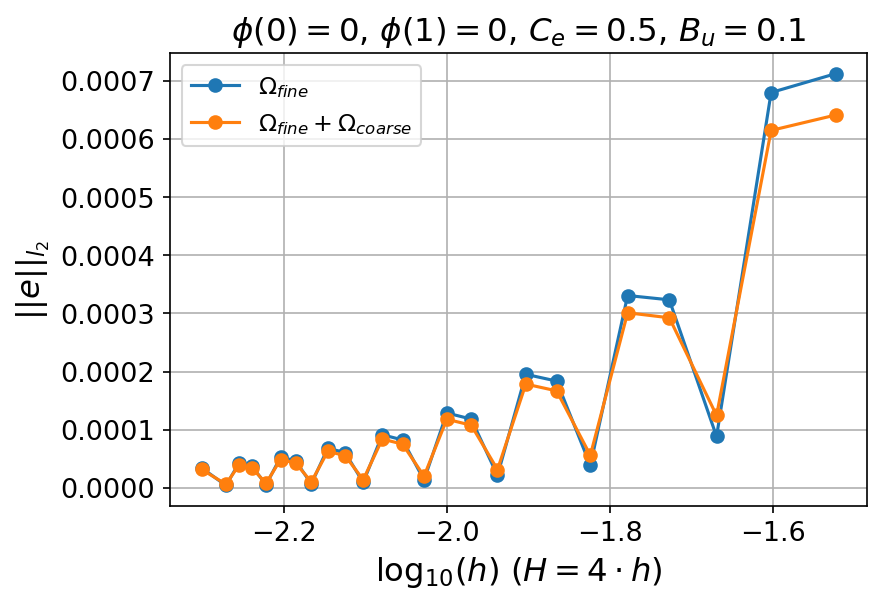

In [9]:
start = 0
end = 1
a = 0
b = 0
e = 1
#h = 0.05
#H = 0.1
buffer = 0.1
split = 0.5

steps2 = np.linspace(5,30,25)
steps2 = np.array([int(x) for x in steps2])
steps1 = 4*steps2

def funct(x,a,b,c,d):
    return a*x**b + c*(4*x)**d

hs = []
Hs = []
errs = []
errs1 = []
for step1,step2 in zip(steps1,steps2):
    A,r,C1,C2, stepsizes =chimera(start = start, end = end,split = split, h = h,H = H,buffer =buffer,
                                  e = e,BC1 = a,BC2 = b, q_int = None,q = q3, steps1 = step1+1,steps2 =step2+1)
    y = np.concatenate([analytic3(C1),analytic3(C2)])
    phi = np.linalg.solve(A,r)
    errs.append(error(phi,y,C = 0))
    errs1.append(error(phi[:C1.shape[0]],y[:C1.shape[0]],C = 0))
    hs.append(stepsizes[0])
    Hs.append(stepsizes[1])
hs = np.array(hs)
Hs = np.array(Hs)
errs = np.array(errs)
errs1 = np.array(errs1)

legendlist = []
popt, pcov = curve_fit(funct, hs, errs1)
plt.plot(np.log10(hs),errs1,marker = 'o', linestyle = "-",zorder = 12, c = 'C0')
test = np.linspace(hs.min(),hs.max(),100)
#plt.plot(np.log10(test),funct(test,popt[0],popt[1],popt[2],popt[3]), C = 'C0',linestyle = '--')
legendlist.extend(('$\Omega_{fine}$',))

#plt.show()

#popt, pcov = curve_fit(funct, hs, errs)
plt.plot(np.log10(hs),errs,marker = 'o', zorder = 13, linestyle = "-", c = 'C1')
test = np.linspace(hs.min(),hs.max(),100)
#plt.plot(np.log10(test),funct(test,popt[0],popt[1],popt[2],popt[3]), c = 'C1',linestyle = '--')
plt.xlabel('$\log_{10}(h)$ $(H = 4 \cdot h)$')
plt.grid(True)
legendlist.extend(('$\Omega_{fine} + \Omega_{coarse}$',))
plt.title('$\phi(0)='+str(a)+'$, $\phi(1)='+str(b)+'$, $C_e=' +str(split)
          + '$, $B_u = ' + str(buffer) + '$')
plt.legend(legendlist)
#plt.xscale('log')
plt.ylabel('$||e||_{l_2}$')
plt.show()

# Minimizing $B_u$

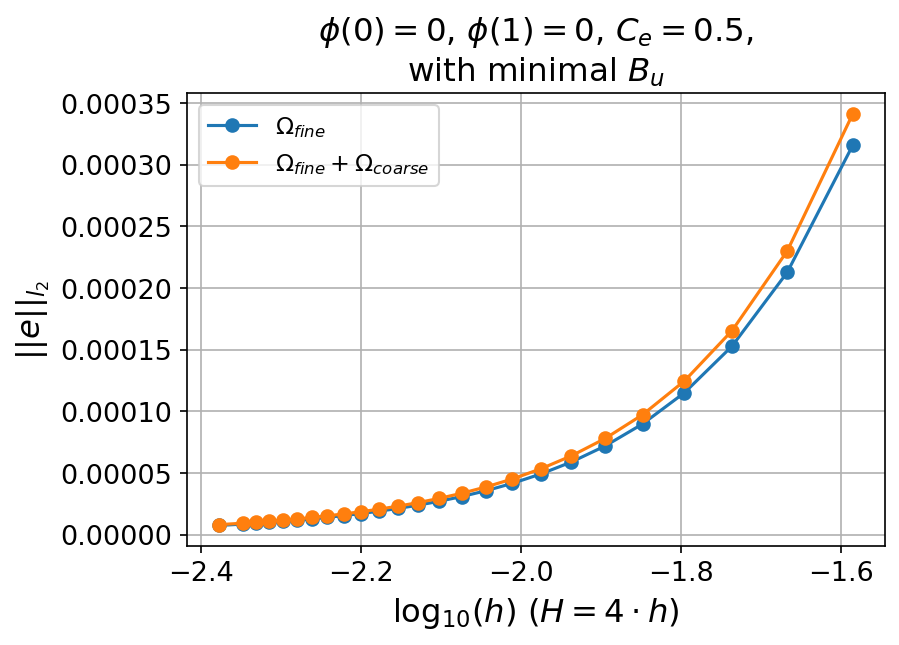

In [10]:
start = 0
end = 1
a = 0
b = 0
e = 1
#h = 0.05
#H = 0.1
buffer = None
split = 0.5

steps2 = np.linspace(5,30,25)
steps2 = np.array([int(x) for x in steps2])
steps1 = 4*steps2


hs = []
Hs = []
errs = []
errs1 = []
for step1,step2 in zip(steps1,steps2):
    A,r,C1,C2, stepsizes =chimera(start = start, end = end,split = split, h = h,H = H,buffer =buffer,
                                  e = e,BC1 = a,BC2 = b, q_int = None,q = q3, steps1 = step1+1,steps2 =step2+1,minimize_buffer = True)
    y = np.concatenate([analytic3(C1),analytic3(C2)])
    phi = np.linalg.solve(A,r)
    errs.append(error(phi,y,C = 0))
    errs1.append(error(phi[:C1.shape[0]],y[:C1.shape[0]],C = 0))
    hs.append(stepsizes[0])
    Hs.append(stepsizes[1])

hs = np.array(hs)
Hs = np.array(Hs)
errs = np.array(errs)
errs1 = np.array(errs1)

legendlist = []
#popt, pcov = curve_fit(funct, hs, errs1)
plt.plot(np.log10(hs),errs1,marker = 'o')
test = np.linspace(hs.min(),hs.max(),100)
#plt.plot(np.log10(test),funct(test,popt[0],popt[1]), C = 'C0',linestyle = '--')
legendlist.extend(('$\Omega_{fine}$',))

#plt.show()

popt, pcov = curve_fit(funct, hs, errs)
plt.plot(np.log10(hs),errs,marker = 'o', zorder = 13)
test = np.linspace(hs.min(),hs.max(),100)
#plt.plot(np.log10(test),funct(test,popt[0],popt[1]), c = 'C1',linestyle = '--')
plt.xlabel('$\log_{10}(h)$ $(H = 4 \cdot h)$')
plt.grid(True)
legendlist.extend(('$\Omega_{fine} + \Omega_{coarse}$',))
plt.title('$\phi(0)='+str(a)+'$, $\phi(1)='+str(b)+'$, $C_e=' +str(split)
          + ',$\nwith minimal $B_u$')
plt.legend(legendlist)
#plt.xscale('log')
plt.ylabel('$||e||_{l_2}$')
plt.show()

# Varying the multiplier $m$

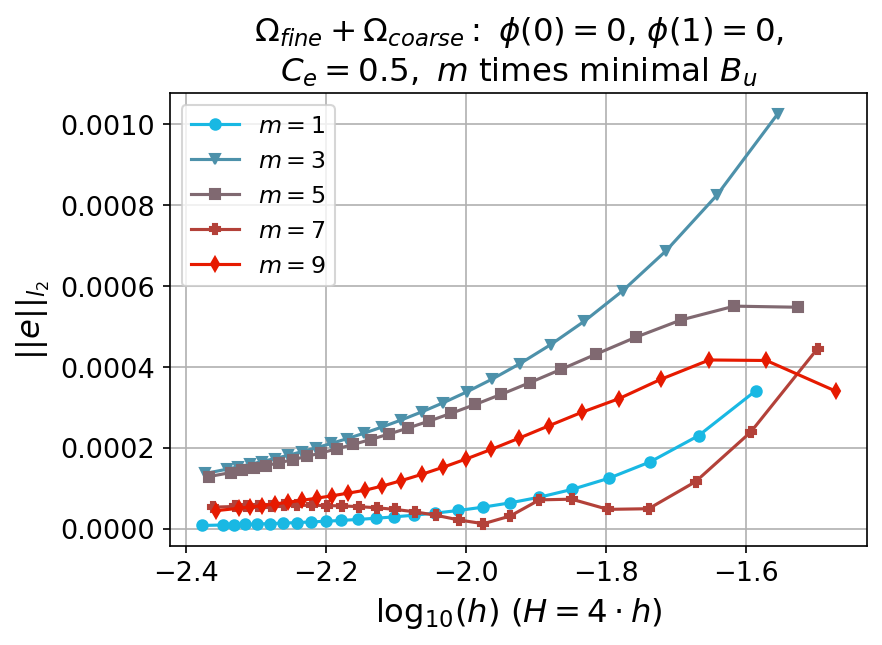

In [11]:
start = 0
end = 1
a = 0
b = 0
e = 1
#h = 0.05
#H = 0.1
buffer = None
split = 0.5
legendlist = []
steps2 = np.linspace(5,30,25)
steps2 = np.array([int(x) for x in steps2])
steps1 = 4*steps2
ms = [1,3,5,7,9]
markers = ['o','v','s','P','d']
for m in ms:
    hs = []
    Hs = []
    errs = []
    errs1 = []
    for step1,step2 in zip(steps1,steps2):
        A,r,C1,C2, stepsizes =chimera(start = start, end = end,split = split, h = h,H = H,buffer =buffer,
                                      e = e,BC1 = a,BC2 = b, q_int = None,q = q3, steps1 = step1+1,steps2 =step2+1,minimize_buffer = True,
                                     minimize_multiplier = m)
        y = np.concatenate([analytic3(C1),analytic3(C2)])
        phi = np.linalg.solve(A,r)
        errs.append(error(phi,y,C = 0))
        errs1.append(error(phi[:C1.shape[0]],y[:C1.shape[0]],C = 0))
        hs.append(stepsizes[0])
        Hs.append(stepsizes[1])

    hs = np.array(hs)
    Hs = np.array(Hs)
    errs = np.array(errs)
    
    cf = m/max(ms)
    color = (0.9*cf,0.7*(1-cf)+0.1,1-cf)

    #popt, pcov = curve_fit(funct, hs, errs)
    plt.plot(np.log10(hs),errs,marker = markers[ms.index(m)], linestyle = "-", c = color,markersize =5)
    test = np.linspace(hs.min(),hs.max(),100)
    #plt.plot(np.log10(test),funct(test,popt[0],popt[1]), c = color, linestyle = '--')
    plt.xlabel('$\log_{10}(h)$ $(H = 4 \cdot h)$')
    plt.grid(True)
    legendlist.append('$m = ' + str(m) + "$")
    plt.title('$\Omega_{fine} + \Omega_{coarse}:$ $\phi(0)='+str(a)+'$, $\phi(1)='+str(b)+'$,\n$C_e=' +str(split)
              + ',$ $m$ times minimal $B_u$')
#plt.yscale('log')
plt.ylabel('$||e||_{l_2}$')
plt.legend(legendlist)
plt.show()

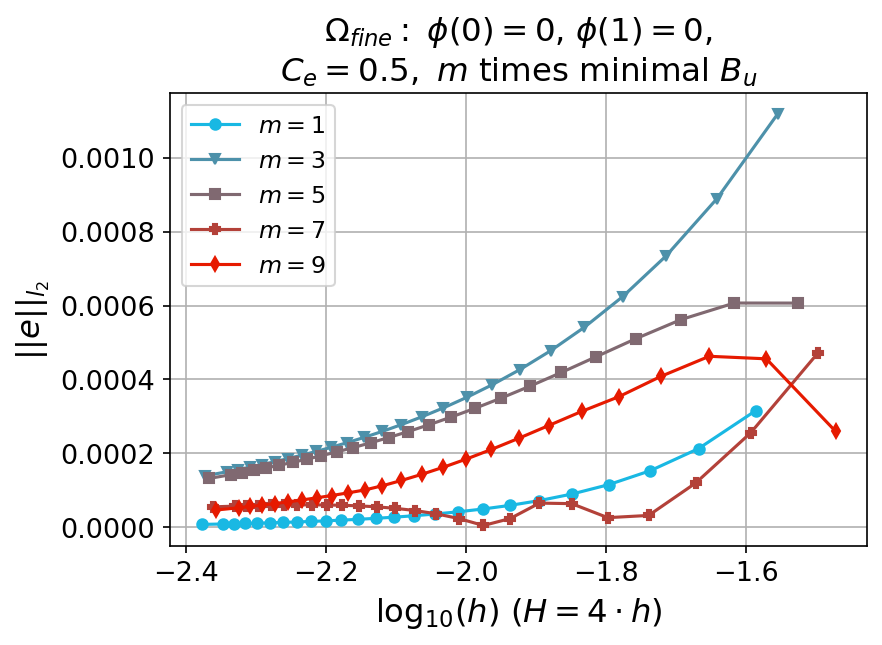

In [12]:
start = 0
end = 1
a = 0
b = 0
e = 1
#h = 0.05
#H = 0.1
buffer = None
split = 0.5
legendlist = []
steps2 = np.linspace(5,30,25)
steps2 = np.array([int(x) for x in steps2])
steps1 = 4*steps2
ms = [1,3,5,7,9]
markers = ['o','v','s','P','d']
for m in ms:
    hs = []
    Hs = []
    errs = []
    errs1 = []
    for step1,step2 in zip(steps1,steps2):
        A,r,C1,C2, stepsizes =chimera(start = start, end = end,split = split, h = h,H = H,buffer =buffer,
                                      e = e,BC1 = a,BC2 = b, q_int = None,q = q3, steps1 = step1+1,steps2 =step2+1,minimize_buffer = True,
                                     minimize_multiplier = m)
        y = np.concatenate([analytic3(C1),analytic3(C2)])
        phi = np.linalg.solve(A,r)
        errs.append(error(phi,y,C = 0))
        errs1.append(error(phi[:C1.shape[0]],y[:C1.shape[0]],C = 0))
        hs.append(stepsizes[0])
        Hs.append(stepsizes[1])

    hs = np.array(hs)
    Hs = np.array(Hs)
    errs = np.array(errs1)
    
    cf = m/max(ms)
    color = (0.9*cf,0.7*(1-cf)+0.1,1-cf)

    #popt, pcov = curve_fit(funct, hs, errs)
    plt.plot(np.log10(hs),errs,marker = markers[ms.index(m)], linestyle = "-", c = color,markersize = 5)
    test = np.linspace(hs.min(),hs.max(),100)
    #plt.plot(np.log10(test),funct(test,popt[0],popt[1]), c = color, linestyle = '--')
    plt.xlabel('$\log_{10}(h)$ $(H = 4 \cdot h)$')
    plt.grid(True)
    legendlist.append('$m = ' + str(m) + '$')
    plt.title('$\Omega_{fine}:$ $\phi(0)='+str(a)+'$, $\phi(1)='+str(b)+'$,\n$C_e=' +str(split)
              + ',$ $m$ times minimal $B_u$')
#plt.xscale('log')
plt.ylabel('$||e||_{l_2}$')
plt.legend(legendlist)
plt.show()

# Varying $B_u$

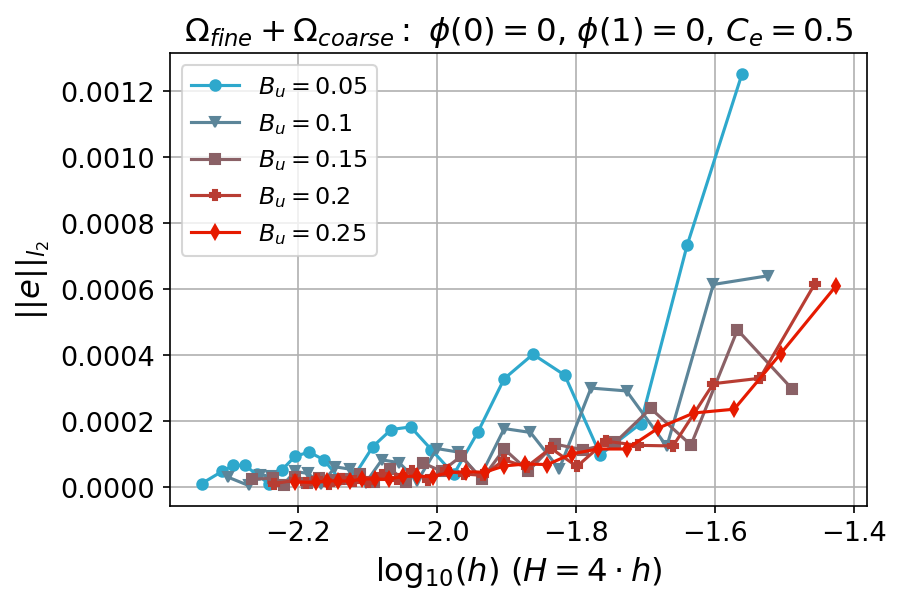

In [13]:
start = 0
end = 1
a = 0
b = 0
e = 1
#h = 0.05
#H = 0.1
buffer = None
split = 0.5
legendlist = []
steps2 = np.linspace(5,30,25)
steps2 = np.array([int(x) for x in steps2])
steps1 = 4*steps2
buffers = [0.05,0.1,0.15,0.2,0.25]
markers = ['o','v','s','P','d']
for buffer in buffers:
    hs = []
    Hs = []
    errs = []
    errs1 = []
    for step1,step2 in zip(steps1,steps2):
        A,r,C1,C2, stepsizes =chimera(start = start, end = end,split = split, h = h,H = H,buffer =buffer,
                                      e = e,BC1 = a,BC2 = b, q_int = None,q = q3, steps1 = step1+1,steps2 =step2+1,minimize_buffer = False,
                                     minimize_multiplier = None)
        y = np.concatenate([analytic3(C1),analytic3(C2)])
        phi = np.linalg.solve(A,r)
        errs.append(error(phi,y,C = 0))
        errs1.append(error(phi[:C1.shape[0]],y[:C1.shape[0]],C = 0))
        hs.append(stepsizes[0])
        Hs.append(stepsizes[1])

    hs = np.array(hs)
    Hs = np.array(Hs)
    errs = np.array(errs)
    
    cf = buffer/max(buffers)
    color = (0.9*cf,0.7*(1-cf)+0.1,1-cf)

    #popt, pcov = curve_fit(funct, hs, errs)
    plt.plot(np.log10(hs),errs,marker = markers[buffers.index(buffer)], linestyle = "-", c = color,markersize = 5)
    test = np.linspace(hs.min(),hs.max(),100)
    #plt.plot(np.log10(test),funct(test,popt[0],popt[1]), c = color, linestyle = '--')
    plt.xlabel('$\log_{10}(h)$ $(H = 4 \cdot h)$')
    plt.grid(True)
    legendlist.append('$B_u = ' + str(buffer) + '$')
    plt.title('$\Omega_{fine} + \Omega_{coarse}:$ $\phi(0)='+str(a)+'$, $\phi(1)='+str(b)+'$, $C_e=' +str(split)
              + '$')
#plt.xscale('log')
plt.ylabel('$||e||_{l_2}$')
plt.legend(legendlist)
plt.show()

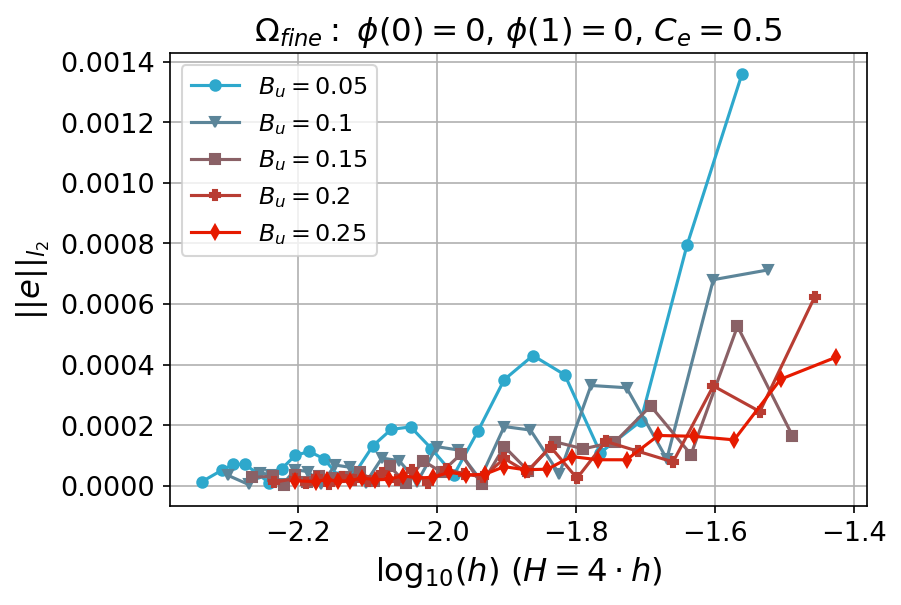

In [14]:
start = 0
end = 1
a = 0
b = 0
e = 1
#h = 0.05
#H = 0.1
buffer = None
split = 0.5
legendlist = []
steps2 = np.linspace(5,30,25)
steps2 = np.array([int(x) for x in steps2])
steps1 = 4*steps2
buffers = [0.05,0.1,0.15,0.2,0.25]
markers = ['o','v','s','P','d']
for buffer in buffers:
    hs = []
    Hs = []
    errs = []
    errs1 = []
    for step1,step2 in zip(steps1,steps2):
        A,r,C1,C2, stepsizes =chimera(start = start, end = end,split = split, h = h,H = H,buffer =buffer,
                                      e = e,BC1 = a,BC2 = b, q_int = None,q = q3, steps1 = step1+1,steps2 =step2+1,minimize_buffer = False,
                                     minimize_multiplier = None)
        y = np.concatenate([analytic3(C1),analytic3(C2)])
        phi = np.linalg.solve(A,r)
        errs.append(error(phi,y,C = 0))
        errs1.append(error(phi[:C1.shape[0]],y[:C1.shape[0]],C = 0))
        hs.append(stepsizes[0])
        Hs.append(stepsizes[1])

    hs = np.array(hs)
    Hs = np.array(Hs)
    errs = np.array(errs1)
    
    cf = buffer/max(buffers)
    color = (0.9*cf,0.7*(1-cf)+0.1,1-cf)

    #popt, pcov = curve_fit(funct, hs, errs)
    plt.plot(np.log10(hs),errs,marker =  markers[buffers.index(buffer)], linestyle = "-", c = color,markersize = 5)
    test = np.linspace(hs.min(),hs.max(),100)
    #plt.plot(np.log10(test),funct(test,popt[0],popt[1]), c = color, linestyle = '--')
    plt.xlabel('$\log_{10}(h)$ $(H = 4 \cdot h)$')
    plt.grid(True)
    legendlist.append('$B_u = ' + str(buffer) + '$')
    plt.title('$\Omega_{fine}:$ $\phi(0)='+str(a)+'$, $\phi(1)='+str(b)+'$, $C_e=' +str(split) + '$')
#plt.xscale('log')
plt.legend(legendlist)
plt.ylabel('$||e||_{l_2}$')
plt.show()

# Change ratio

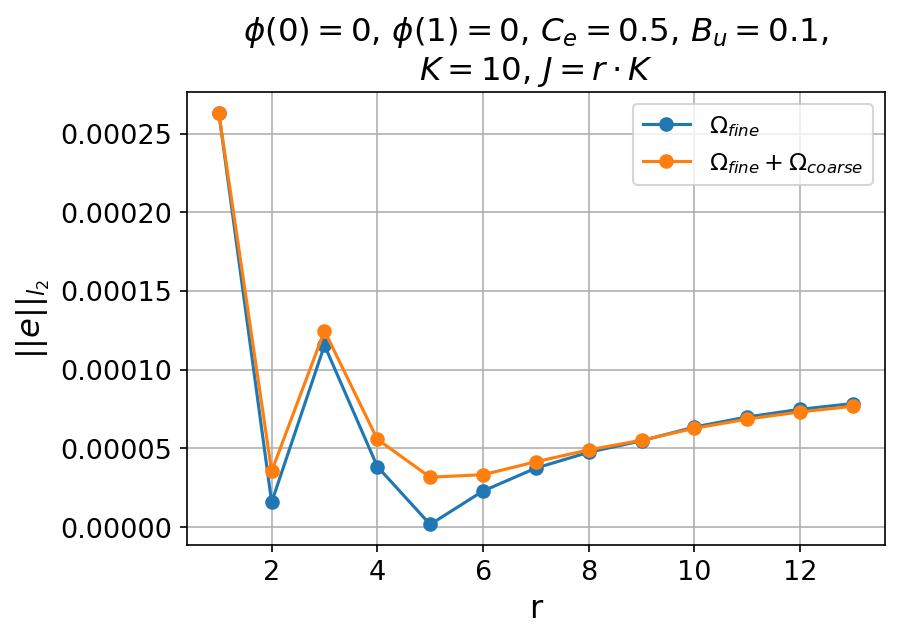

In [15]:
start = 0
end = 1
a = 0
b = 0
e = 1
#h = 0.05
#H = 0.1
buffer = 0.1
split = 0.5

step2 = 10
ratios = [1,2,3,4,5,6,7,8,9,10,11,12,13]

hs = []
Hs = []
errs = []
errs1 = []
for r in ratios:
    step1 = step2*r
    A,r,C1,C2, stepsizes =chimera(start = start, end = end,split = split, h = h,H = H,buffer =buffer,
                                  e = e,BC1 = a,BC2 = b, q_int = None,q = q3, steps1 = step1+1,steps2 =step2+1)
    y = np.concatenate([analytic3(C1),analytic3(C2)])
    phi = np.linalg.solve(A,r)
    errs.append(error(phi,y,C = 0))
    errs1.append(error(phi[:C1.shape[0]],y[:C1.shape[0]],C = 0))
    hs.append(stepsizes[0])
    Hs.append(stepsizes[1])
hs = np.array(hs)
Hs = np.array(Hs)
errs = np.array(errs)
errs1 = np.array(errs1)
plt.plot(ratios,errs1,marker = 'o')
plt.plot(ratios,errs,marker = 'o')
plt.ylabel('$||e||_{l_2}$')
plt.legend(('$\Omega_{fine}$','$\Omega_{fine} + \Omega_{coarse}$'))
plt.title('$\phi(0)='+str(a)+'$, $\phi(1)='+str(b)+'$, $C_e=' +str(split)
          + '$, $B_u = ' + str(buffer) + '$,\n$K = ' + str(step2)+'$, $J = r \cdot K$')
plt.grid(True)
plt.xlabel('r')
plt.show()

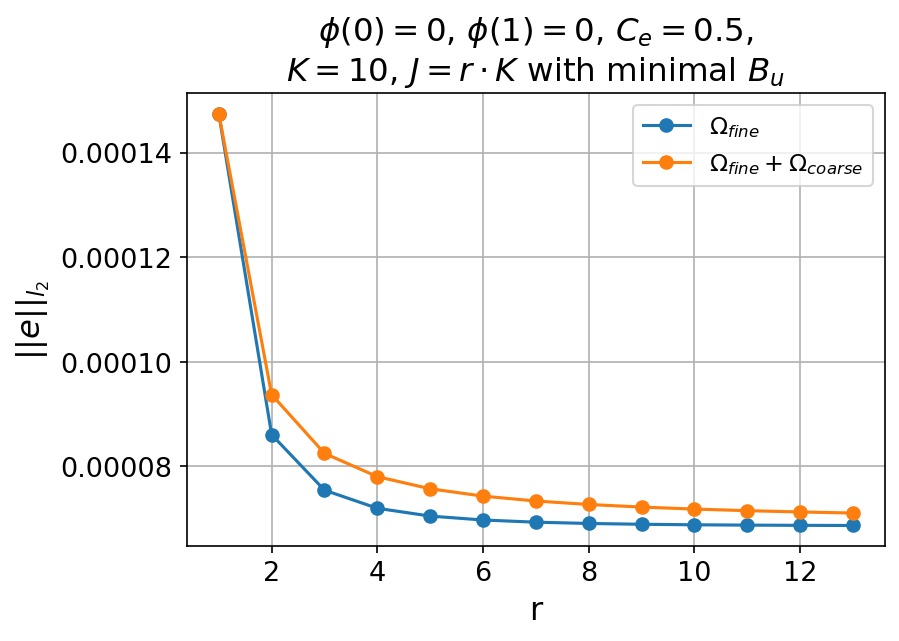

In [16]:
start = 0
end = 1
a = 0
b = 0
e = 1
#h = 0.05
#H = 0.1
buffer = 0.1
split = 0.5

step2 = 10
ratios = [1,2,3,4,5,6,7,8,9,10,11,12,13]

hs = []
Hs = []
errs = []
errs1 = []
for r in ratios:
    step1 = step2*r
    A,r,C1,C2, stepsizes =chimera(start = start, end = end,split = split, h = h,H = H,buffer =buffer,
                                  e = e,BC1 = a,BC2 = b, q_int = None,q = q3, steps1 = step1+1,steps2 =step2+1,minimize_buffer = True,
                                     minimize_multiplier = 1)
    y = np.concatenate([analytic3(C1),analytic3(C2)])
    phi = np.linalg.solve(A,r)
    errs.append(error(phi,y,C = 0))
    errs1.append(error(phi[:C1.shape[0]],y[:C1.shape[0]],C = 0))
    hs.append(stepsizes[0])
    Hs.append(stepsizes[1])
hs = np.array(hs)
Hs = np.array(Hs)
errs = np.array(errs)
errs1 = np.array(errs1)
plt.plot(ratios,errs1,marker = 'o')
plt.plot(ratios,errs,marker = 'o')
plt.ylabel('$||e||_{l_2}$')
plt.legend(('$\Omega_{fine}$','$\Omega_{fine} + \Omega_{coarse}$'))
plt.title('$\phi(0)='+str(a)+'$, $\phi(1)='+str(b)+'$, $C_e=' +str(split)
          + '$,\n$K = ' + str(step2)+'$, $J = r \cdot K$ with minimal $B_u$')
plt.grid(True)
plt.xlabel('r')
plt.show()